# **BUSINESS ANALYTICS: Customer Churn Prediction & How to Deal with It**
Created by : Ajeng Aulia Salshabila

## **A. Business Problem Understanding**

**Context**

A leading e-commerce company aims to better understand customer churn behavior. In the online retail industry, the cost of acquiring new customers is significantly higher than the cost of retaining existing ones. Therefore, having the ability to identify customers who are likely to churn is crucial for minimizing revenue loss and optimizing retention strategies.

The company has access to historical customer data, including transaction volume, shopping frequency, purchase value, customer service interactions, and other behavioral indicators that reflect customer engagement. Using this information, the company seeks to build a predictive churn model.

**Target / Label**  

1 : Churn  
0 : Not churn

Since the company’s primary goal is to detect customers who are at high risk of leaving the platform so that appropriate promotional offers can be provided, the positive class for the model is churn (1).

**Problem Statement**  

The company currently lacks a systematic way to identify customers who are at risk of churning. As a result, retention promos are often sent broadly and inefficiently, increasing marketing costs while failing to reach customers who truly need intervention. This inefficiency leads to unnecessary spending and missed opportunities to prevent revenue loss.  

To address this, the company needs a machine learning model that can predict each customer's likelihood of churn.

**Goals**  

- Build a classification model to identify customers likely to churn.  
- Generate churn probability scores to help prioritize retention efforts.  
- Minimize false negatives, ensuring customers who are at risk of churning are not overlooked.

**Stakeholders**
- Marketing & Retention Team
- Product & Service Development Team
- Executive Management (C-Levels)

**Analytic Approach**

- Conducting Exploratory Data Analysis (EDA) to understand churn patterns and customer behavior.
- Performing data cleaning, handling missing values, encoding categorical variables, and treating imbalance.
- Training multiple classification models (Logistic Regression, Decision Tree, Random Forest, XGBoost, LightGBM, KNN, GradientBoosting, SVM).
- Using SMOTE or oversampling techniques to address class imbalance.
- Evaluating and comparing models using relevant metrics.
- Selecting the best-performing model.

**Metric Evaluation**

- Type 1 Error (False Positive)
The model predicts that a customer will churn when in reality they will not.  
**Consequence:** promotional offers are sent to customers who do not need them, leading to unnecessary marketing expenses and reduced efficiency in the retention strategy. Although this results in wasted budget, it does not directly harm long-term revenue because these customers were not going to leave.

- Type 2 Error (False Negative)
The model predicts that a customer will not churn when in fact they will.  
**Consequence:** truly at-risk customers do not receive retention promotions, causing missed opportunities to prevent churn and potential revenue loss. This outcome is more detrimental to the business, as losing customers directly impacts long-term profitability.  

Given these consequences, **reducing False Negatives is more critical**. The company’s main objective is to accurately identify customers who are likely to churn so that timely and targeted promotions can be deployed.  

Therefore, the primary evaluation metric selected for this case is **Recall**, which measures the model’s ability to correctly capture actual churners and minimize false negatives.

## **B. Data Understanding**

**Features**

| Attribute                | Data Type       | Description                                                            |
| ------------------------ | --------------- | ---------------------------------------------------------------------- |
| Tenure                   | Integer         | Duration (in months or years) the customer has been with the company.  |
| WarehouseToHome          | Integer / Float | Distance between the warehouse and the customer’s home.                |
| NumberOfDeviceRegistered | Integer         | Total number of devices registered under the customer’s account.       |
| PreferedOrderCat         | Text            | Customer’s most preferred order category in the last month.            |
| SatisfactionScore        | Integer         | Customer satisfaction rating based on service experience.              |
| MaritalStatus            | Text            | Customer’s marital status.                                             |
| NumberOfAddress          | Integer         | Total number of addresses added by the customer.                       |
| Complaint                | Integer (0/1)   | Indicates whether the customer raised any complaint in the last month. |
| DaySinceLastOrder        | Integer         | Number of days since the customer’s most recent order.                 |
| CashbackAmount           | Float           | Average cashback received in the last month.                           |
| Churn                    | Integer (0/1)   | Churn flag                 |

In [1]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#matrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Visualization settings
%matplotlib inline
sns.set_style('darkgrid')

print("Libraries are successfully loaded.")



Libraries are successfully loaded.


In [2]:
# Load Dataset

churn = pd.read_csv('data_ecommerce_customer_churn.csv')
churn.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [3]:
# Unique Value and Number of Unique Value

col = []
un = []
nun = []

for i in churn.columns :
    col.append(i)
    un.append(churn[i].unique())
    nun.append(churn[i].nunique())

info = pd.DataFrame({
    'Column Name' : col,
    'Unique' : un,
    'Num of Unique' :nun
})

info

,Column Name,Unique,Num of Unique
0,Tenure,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,...",36
1,WarehouseToHome,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0...",33
2,NumberOfDeviceRegistered,"[4, 3, 6, 2, 5, 1]",6
3,PreferedOrderCat,"[Laptop & Accessory, Mobile, Fashion, Others, ...",6
4,SatisfactionScore,"[3, 1, 4, 2, 5]",5
5,MaritalStatus,"[Single, Married, Divorced]",3
6,NumberOfAddress,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]",14
7,Complain,"[0, 1]",2
8,DaySinceLastOrder,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,...",22
9,CashbackAmount,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8...",2335


When checking the unique values, in PreferedOrderCat column, I noticed two entries that basically refer to the same thing: ‘Mobile’ and ‘Mobile Phone’. Since they represent the same category but are written differently, I standardized them into one consistent label. This prevents the model from splitting the signal across duplicated categories and keeps the feature clean before moving on to missing-value handling.

In [4]:
# Unique Values of PreferedOrderCatogory
churn['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

In [5]:
# Convert to lowercase for consistency
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].str.lower().str.strip()

# Merge similar categories
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].replace({
    'mobile': 'mobile phone',
    'phone': 'mobile phone'
})

# Re-capitalize for readability
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].str.title()

# Check Unique Values Again
churn['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: count, dtype: int64

PreferedOrderCat is now clean and consistent, so it’s ready for encoding later. Now let’s move on to checking and handling the missing values.

In [6]:
# Data Information

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [7]:
# Duplicate Check
churn.duplicated().sum()

np.int64(672)

In [8]:
# Find Missing Value

churn.isnull().sum()/len(churn) * 100

Tenure                      4.922608
WarehouseToHome             4.288252
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           5.404720
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64

**Findings:** There are several columns with about 4–5% missing values that need to be cleaned.

In [9]:
# Correlation Missing Values
churn[['Tenure','WarehouseToHome','DaySinceLastOrder']].isna().corr()


,Tenure,WarehouseToHome,DaySinceLastOrder
Tenure,1.000000,-0.048163,-0.054389
WarehouseToHome,-0.048163,1.000000,-0.050595
DaySinceLastOrder,-0.054389,-0.050595,1.000000


Before deciding how to handle the missing values, we first examined the pattern to check whether there was any correlation among the columns with missing data. It turned out there was no correlation between the three. After that, we proceeded to review each column individually to see whether it had any relationship with other columns that contained no missing values.

We will use missingno library to get the results

In [10]:
import missingno as msno

**Barplot Missing Values**

<Axes: >

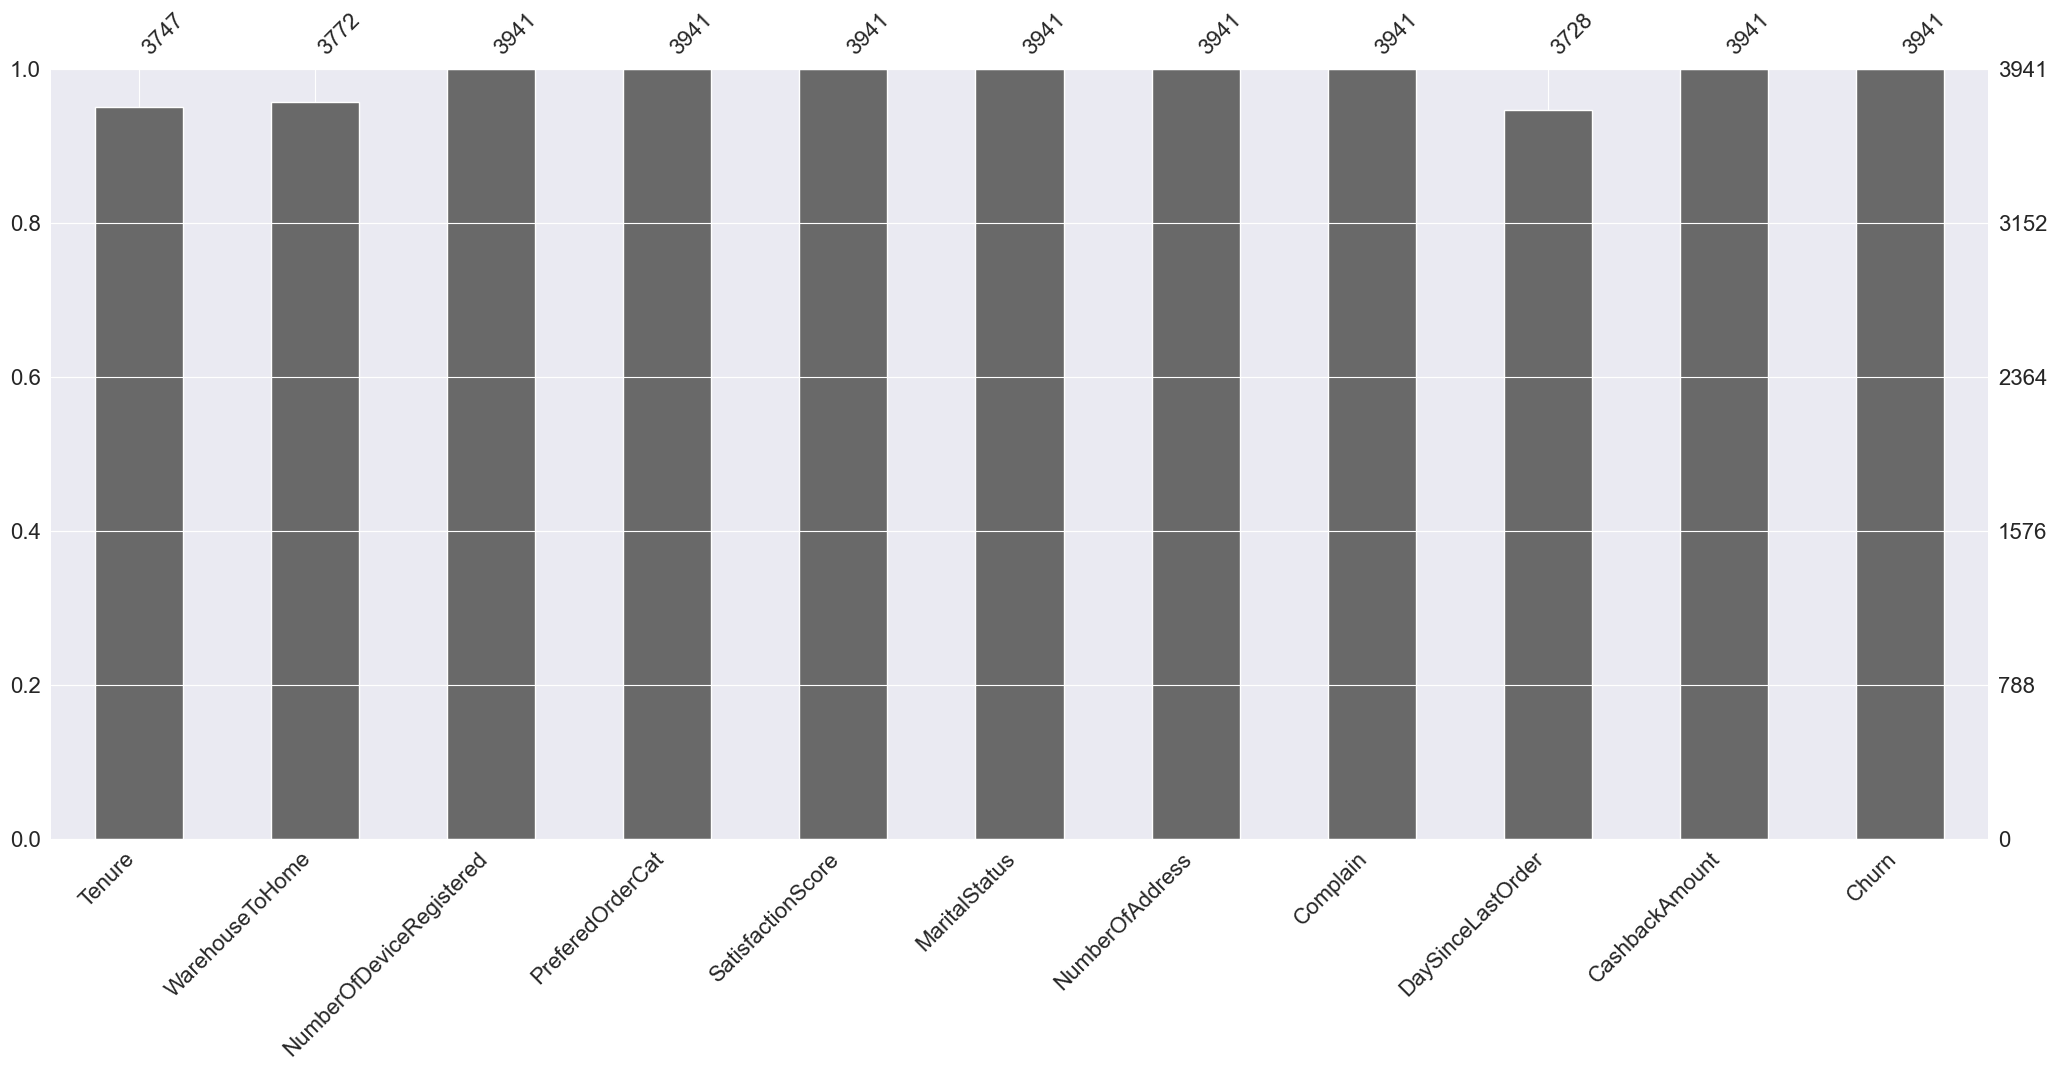

In [11]:
msno.bar(churn)

We can see here that the WarehouseToHome column has the highest number of missing values compared to the others. This is also evident from the previous table.

**Matrix Plot**

<Axes: >

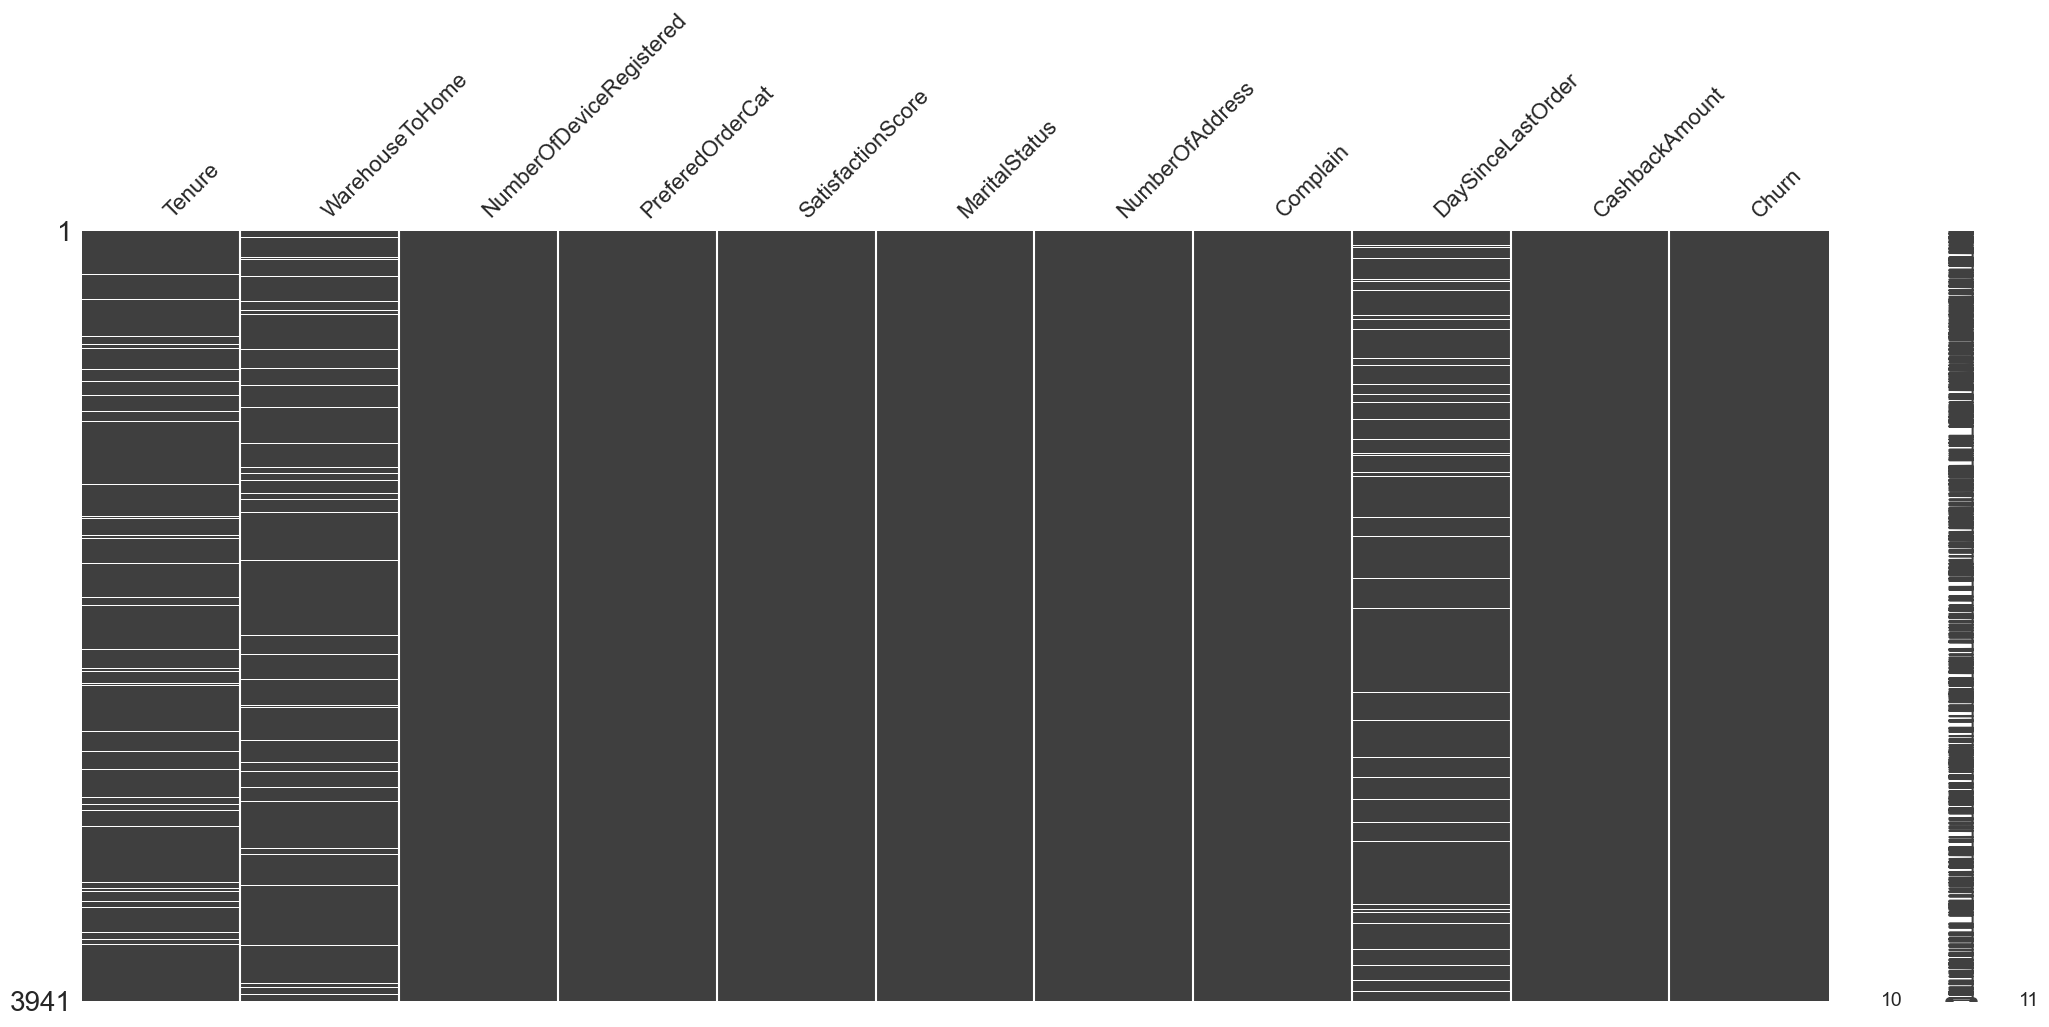

In [12]:
msno.matrix(churn)

The matrix shows the missing values are scattered randomly with no clear pattern, so it’s safe to say the missingness is completely random.

**Heatmap**

In the plot below, we visualize a heatmap that shows the correlation of missing values across the columns that contain nulls in our dataset.

The correlation of missingness ranges from –1 to 1, where:

–1 → Negative correlation
Meaning: if one column has a value present, the other column is almost guaranteed to be missing.

0 → No correlation
Meaning: the presence or absence of a value in one column has no relationship with the other column.

1 → Positive correlation
Meaning: if one column is missing, the other column tends to be missing as well.

This helps us see whether the missing values happen together or completely independently.

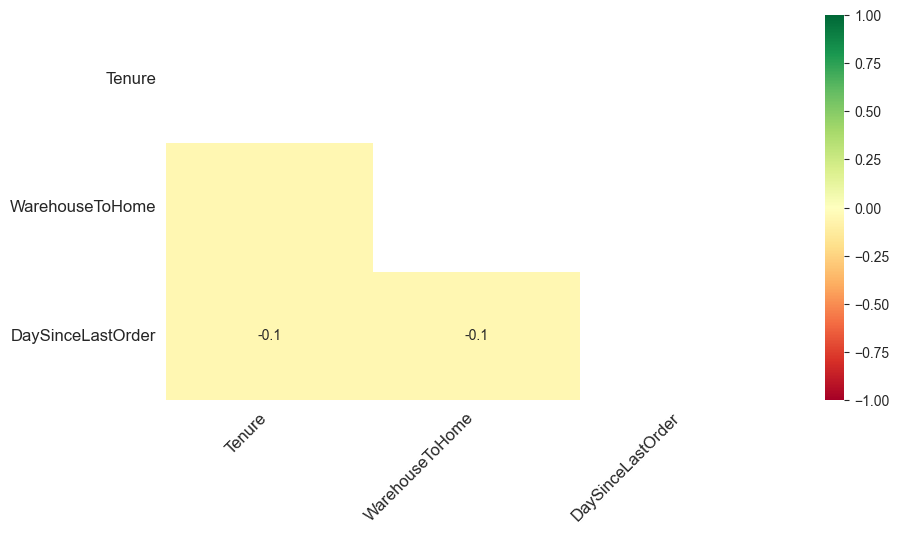

In [13]:
msno.heatmap(churn, cmap="RdYlGn", figsize=(10,5), fontsize=12);

From the heatmap, the missing values don’t show any pattern or connection across the features which means they just appear randomly MCAR (Missing Completely At Random). So we can treat the missingness as completely random, and move on to handle the empty values without worrying about hidden biases.

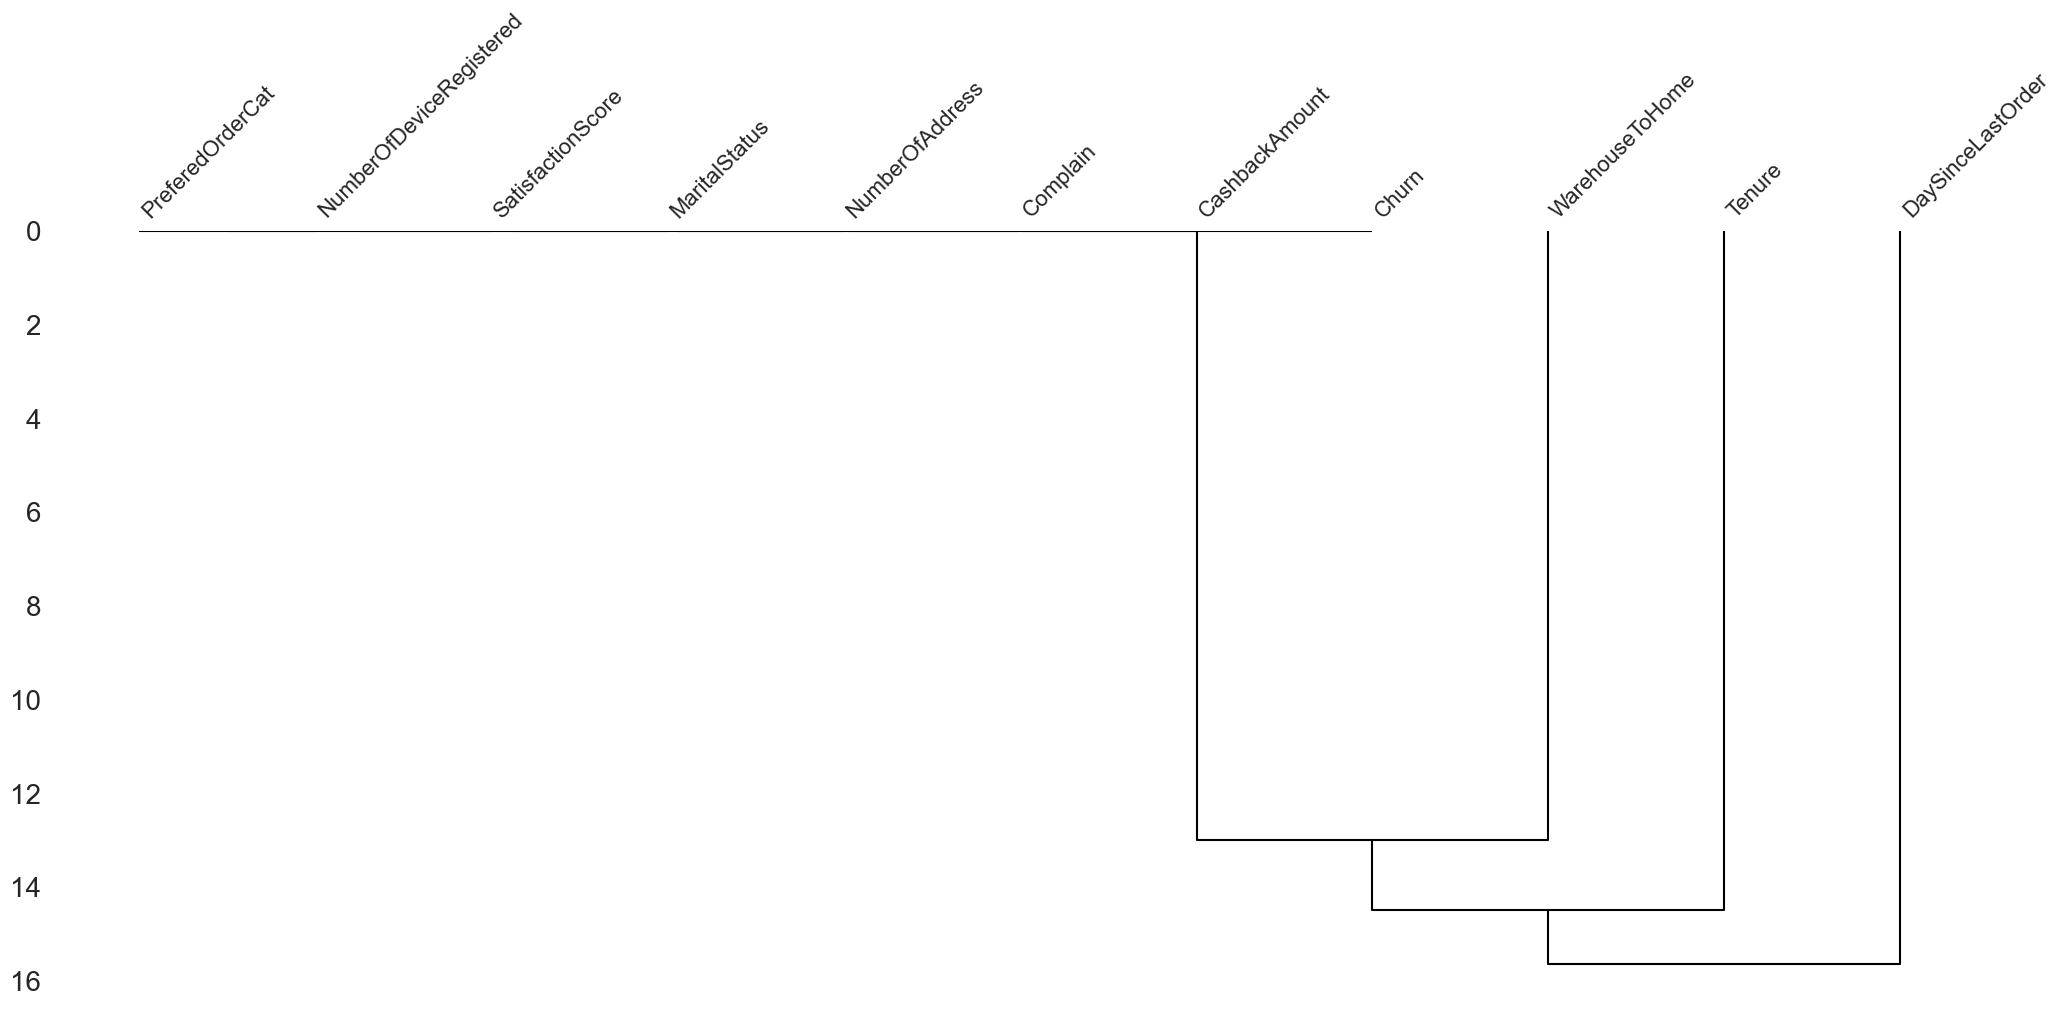

In [14]:
msno.dendrogram(churn)
plt.show()

The dendrogram also shows no clustering between the features with missing values, meaning the missingness doesn’t follow any shared pattern. Each column’s missing values occur independently.

Before deciding between mean or median to fill put the missing values, I checked each feature’s distribution. If a column is skewed, median works better; if it looks more symmetric, mean is fine. This helps make sure the imputation doesn’t distort the original shape of the data.

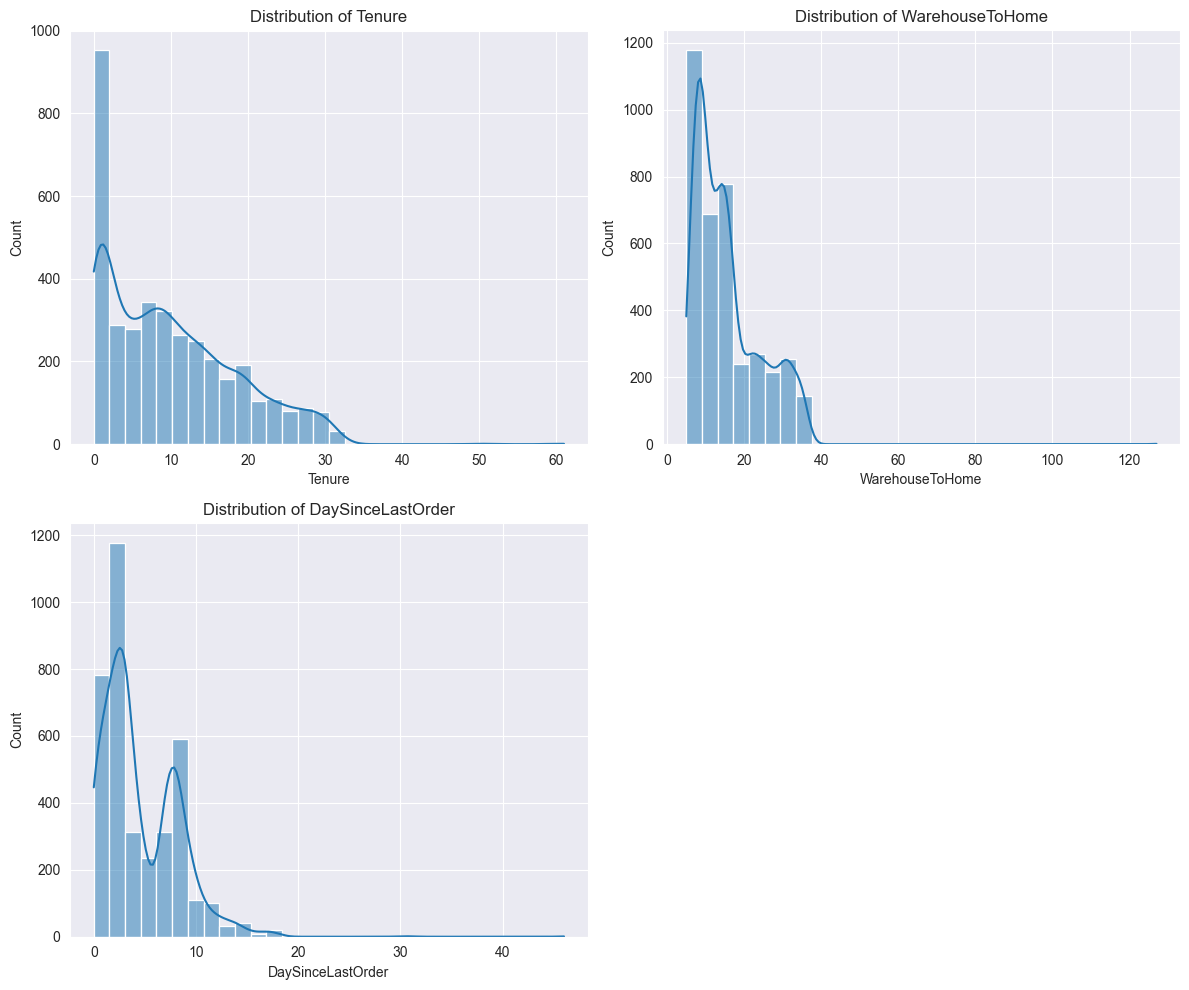

In [15]:
# Distribution of Missing Values

missing = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

plt.figure(figsize=(12, 10))

for i, col in enumerate(missing, 1):
    plt.subplot(2, 2, i)
    sns.histplot(churn[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

After checking the distribution of the numeric columns with missing values, all of them turned out to be heavily skewed. 

*1. Tenure* 
- Most customers have low tenure.  
- Only a few customers stay for a very long time.  
- Those few large values create a long tail on the right side.  

*2. WarehouseToHome*  
- Most customers live relatively close to the warehouse.  
- Only a small number live much farther away.  
- These far distances form a long right tail in the distribution.  

*3. DaySinceLastOrder*  
- Many customers ordered recently.  
- Only a few haven’t ordered in a long time.  
- Those long gaps create another long right tail  

Because of these skewed shapes, using the mean would pull the imputed values toward the outliers and misrepresent the majority of customers. Median is much more stable and better reflects the central tendency for all three features, so it’s the safest choice for imputation.

**Handling Missing Values**

In [16]:
# Missing values imputation

churn['Tenure'] = churn['Tenure'].fillna(churn['Tenure'].median())
churn['WarehouseToHome'] = churn['WarehouseToHome'].fillna(churn['WarehouseToHome'].median())
churn['DaySinceLastOrder'] = churn['DaySinceLastOrder'].fillna(churn['DaySinceLastOrder'].median())

# Checking Missing Values After Imputation
churn.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

All missing values are successfully well-handled.

## **C. Exploratory Data Analysis**

**Churn Distribution**

In [17]:
# Churn Value Count
churn['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

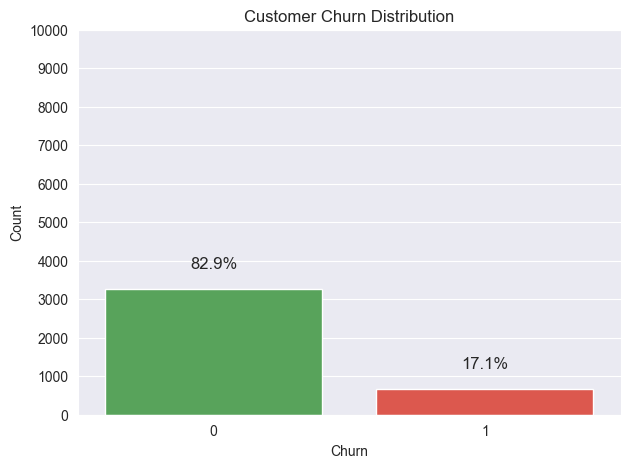

In [18]:
# Distribution of Missing Values (Barplot)

plt.figure(figsize=(7, 5))
sns.countplot(data=churn, x='Churn', palette=['#4CAF50', '#F44336'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.yticks(range(0,10001,1000))

# Percentage Annotation
total = len(churn)
ax = plt.gca()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

The target distribution is highly imbalanced, with only around ~17% churn cases. This confirms that we will need to apply resampling techniques (SMOTE / any other oversampling methods) during modeling to ensure the model can learn from the minority class and avoid bias toward non-churn customers.

**Category vs Churn**

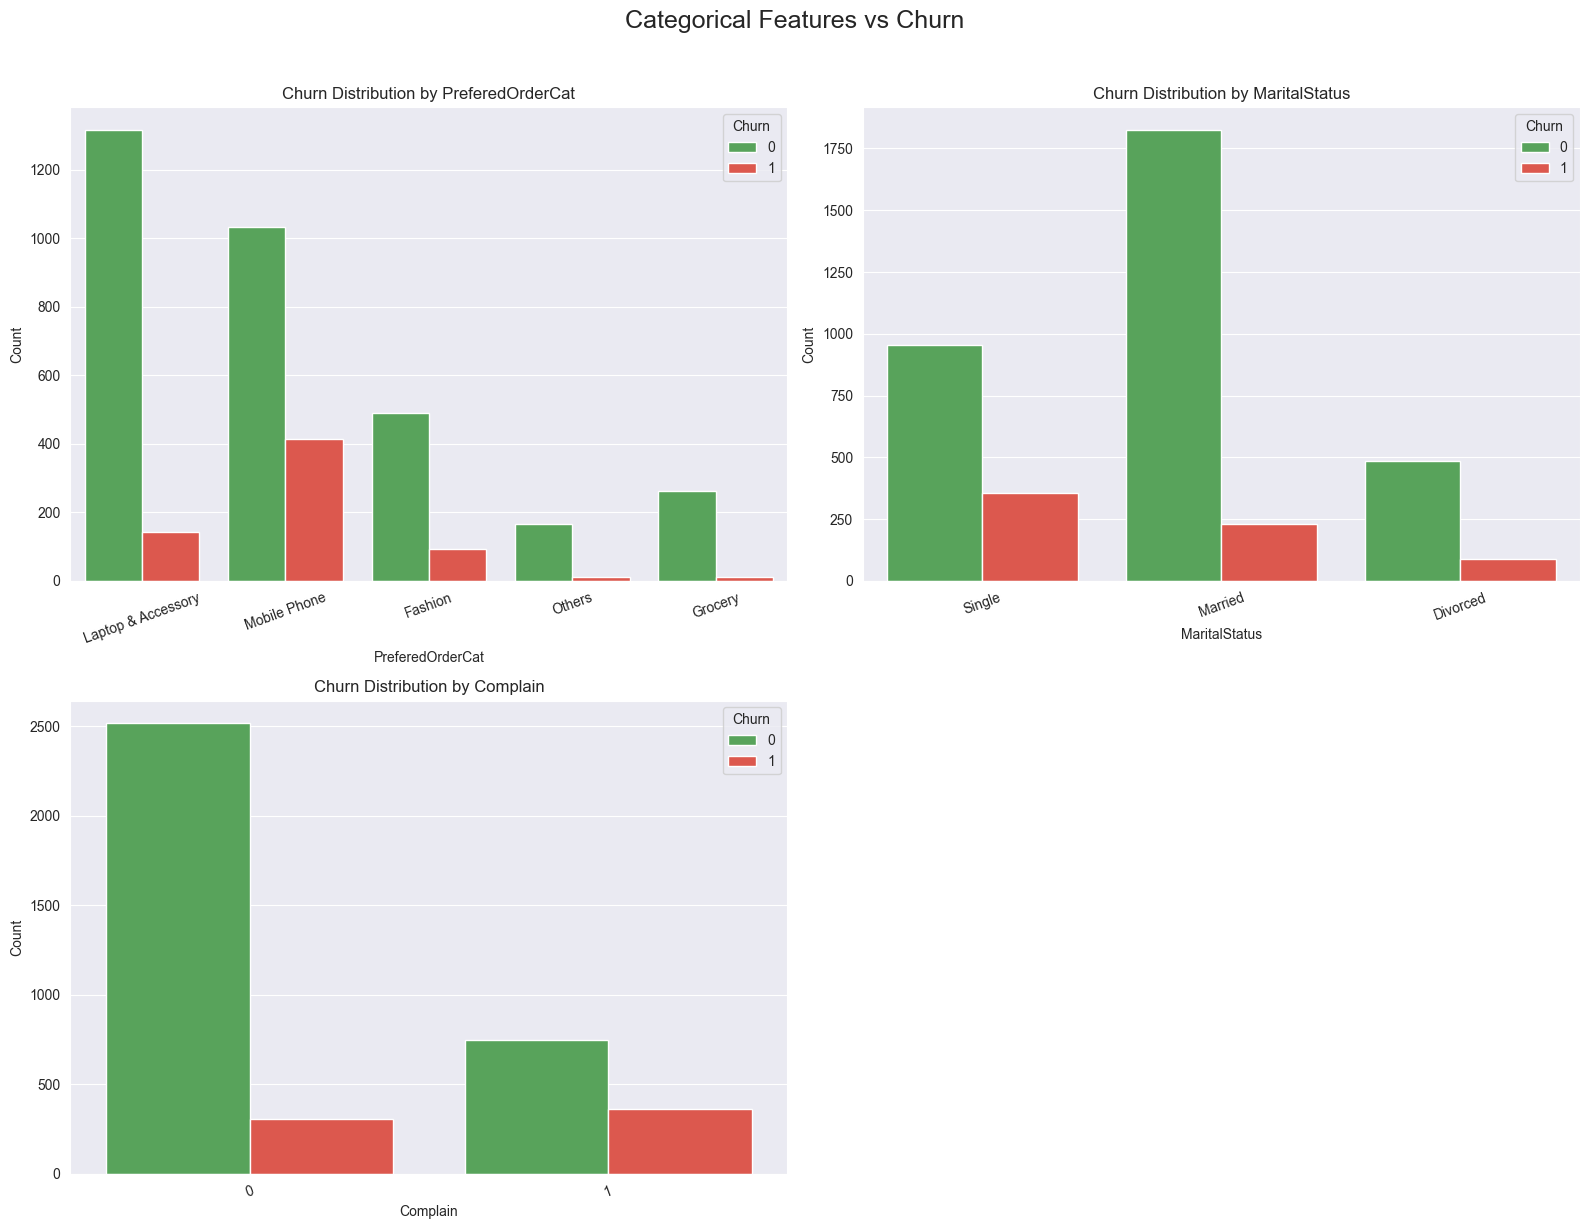

In [19]:
# Categorical features to analyze
cat_cols = ['PreferedOrderCat', 'MaritalStatus', 'Complain']

# Create subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Categorical Features vs Churn', fontsize=18, y=1.02)

# Loop to generate plots
for i, feature in enumerate(cat_cols):
    row = i // 2
    col = i % 2
    
    sns.countplot(
        data=churn,
        x=feature,
        hue='Churn',
        ax=axes[row, col],
        palette=['#4CAF50', '#F44336']  # green = not churn, red = churn
    )
    
    axes[row, col].set_title(f'Churn Distribution by {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=20)
    axes[row, col].legend(title='Churn')

# Hide the empty 4th subplot if needed
axes[1,1].axis('off')

plt.tight_layout()
plt.show()


*Key Insights:*

- **Preferred Order Category:**
Customers who mainly purchase Mobile Phone and Fashion products show a noticeably higher churn presence. These categories may indicate more impulsive or less loyal shopping behavior.

- **Marital Status:**
Single customers churn more frequently than Married customers. Married customers appear more stable and less likely to leave.

- **Complain:**
Customers who submitted a complaint (Complain = 1) churn noticeably more often compared to those who never complained. This suggests that people who already had issues with the service are more likely to leave the platform.

*Notes:*

Even though ‘Churn’ and ‘Complain’ are stored as integers (0/1), they represent binary categorical variables. The numeric format is kept because it is compatible with modeling, but conceptually they are treated as categorical during EDA.

**Numerical vs Churn**

For the numerical features, I only included variables that have a logical connection to churn behavior. Features such as Tenure, DaySinceLastOrder, SatisfactionScore, and CashbackAmount were selected because they directly reflect customer engagement and show potential separation between churn and non-churn groups.

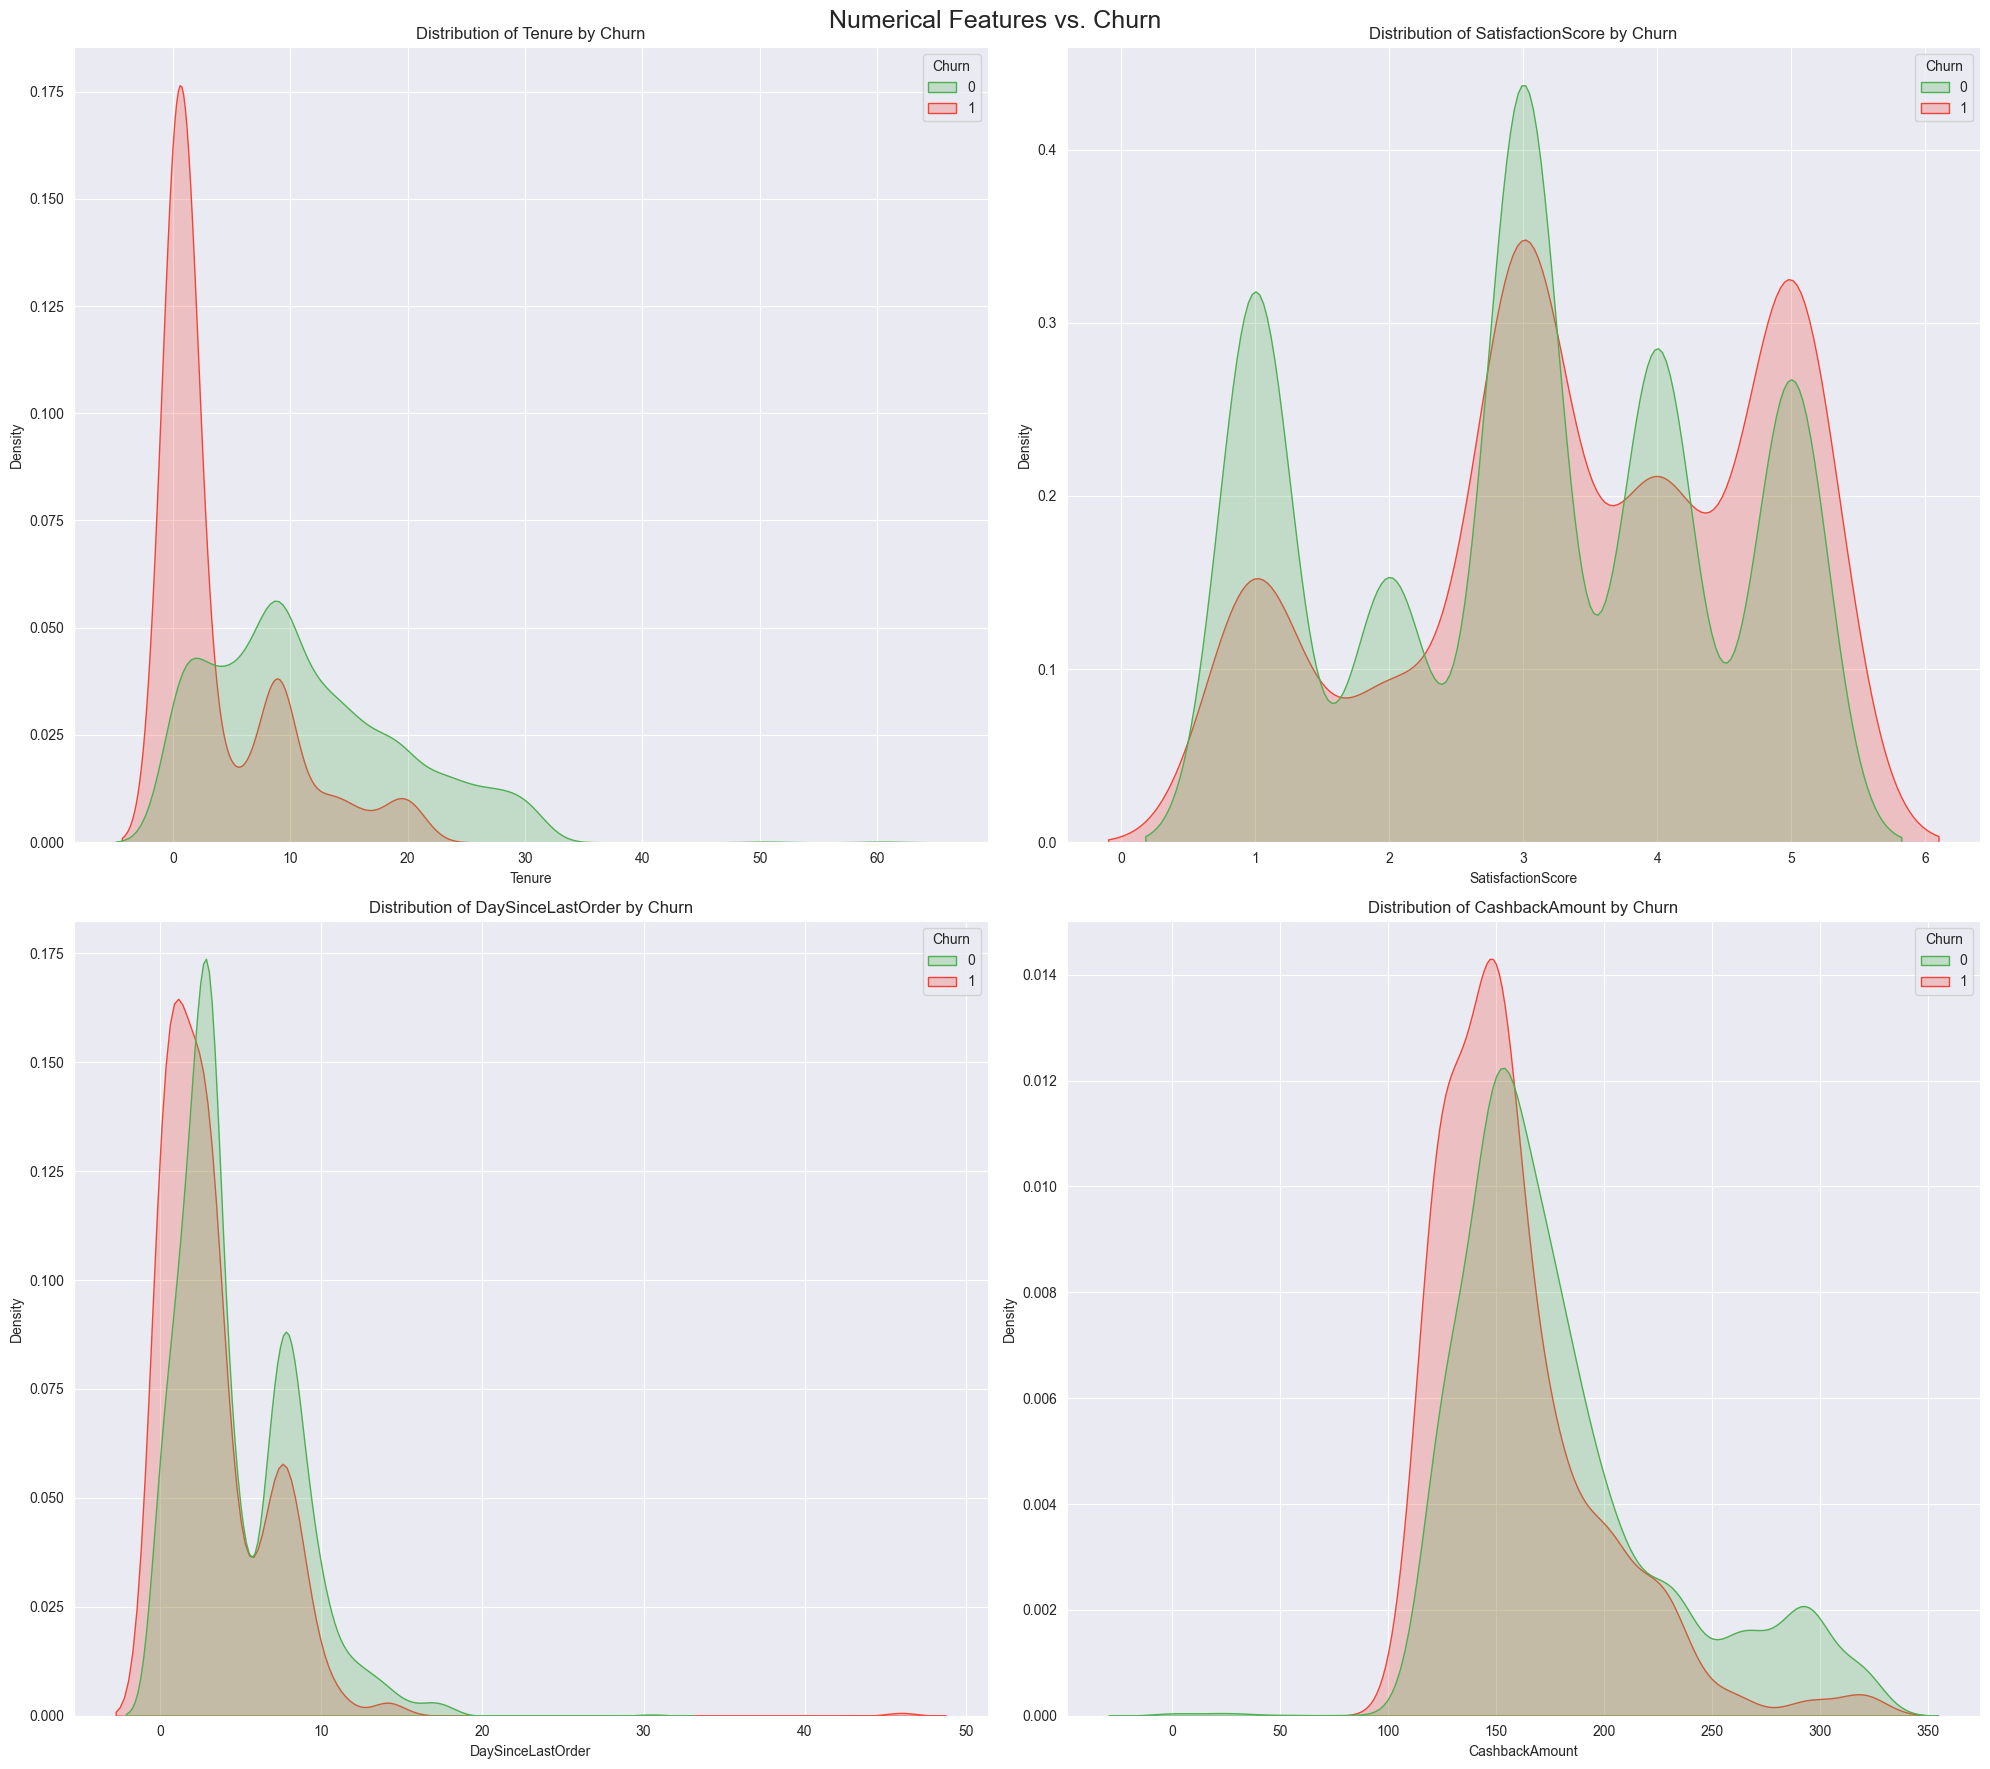

In [20]:
# Numerical Features to analyze
num_cols = ['Tenure', 'SatisfactionScore', 'DaySinceLastOrder','CashbackAmount']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
fig.suptitle('Numerical Features vs. Churn', fontsize=18)

# Loop to generate plots
for i, feature in enumerate(num_cols):
    row = i // 2
    col = i % 2
    
    sns.kdeplot(
        data=churn,
        x=feature,
        hue='Churn',
        fill=True,
        ax=axes[row][col],
        palette=['#4CAF50', '#F44336'],
        common_norm=False
    )
    
    axes[row][col].set_title(f'Distribution of {feature} by Churn')
    axes[row][col].set_xlabel(feature)
    axes[row][col].set_ylabel('Density')

plt.tight_layout()
plt.show()


*Key Insight:*

- **Tenure:** Churn customers are heavily concentrated in short tenure (0–10 months). Longer-tenure customers show much lower churn, indicating stronger loyalty.

- **Satisfaction Score:** Low satisfaction increases churn, but churn also appears among highly satisfied users. This suggests satisfaction alone does not guarantee retention.

- **DaySinceLastOrder:** Churn peaks at very low DaysSinceLastOrder (0–5 days), indicating post-purchase churn. Many users probably make a single purchase and do not return.

- **Cashback Amount:** Higher cashback amounts correspond to lower churn. Cashback appears to act as a retention mechanism, keeping users more engaged and less likely to leave.

**Conclusion:**

Based on the EDA findings, we hypothesize that churn can be effectively predicted using behavioral features rather than demographic attributes. Customers with short tenure, recent one-time purchases, low satisfaction, or a history of submitting complaints are more likely to churn. Patterns in preferred product categories also signal lower loyalty, while higher cashback amounts appear to support retention.

## **D. Data Preparation**

In [21]:
# Save cleaned dataset for modelling

churn_cleaned = churn.copy()
churn_cleaned.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [22]:
# Define feature columns and target variable

num_cols = ['Tenure', 'SatisfactionScore', 'DaySinceLastOrder', 'CashbackAmount']
cat_cols = ['PreferedOrderCat', 'MaritalStatus', 'Complain']

target = 'Churn'

In [23]:
# Train test split
X = churn_cleaned.drop(columns=[target])
y = churn_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
# Preprocessing Encoding & Scaling

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough'
)

preprocessor
print('Processor successfully created.')

Processor successfully created.


## **E. Model Benchmarking (Cross-Validation)**

Now it's time to benchmark all candidate models and see which one performs best.
Instead of using a single train–test split, we will rely on Cross-Validation (CV) to get a more stable and objective estimate of each model’s performance.

**Primary Metric:** Recall

Because the business priority is to identify customers who are likely to churn, our main concern is False Negatives (FN) — cases where the model fails to detect an actual churner. Missing these customers means the company never sends retention promos to the people who actually need them, resulting in revenue loss.

That’s why our main metric is Recall, defined as:

*Recall = True Positive / (True Positive + False Negative)*

**Build Pipeline**

*Notes:* Since churn represents only around 17% of the data, SMOTE or any other parameters is required to help the model learn minority-class patterns more effectively. It helps to generate synthetic churn samples, reducing bias toward the majority class.

In [25]:
# Identify models to evaluate

models = {
    "Logistic Regression": LogisticRegression(
        class_weight='balanced', max_iter=1000, random_state=42),

    "SVM": SVC(
        class_weight='balanced', probability=True, random_state=42),

    "Decision Tree": DecisionTreeClassifier(random_state=42),

    "Random Forest": RandomForestClassifier(random_state=42),

    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(
        eval_metric='logloss', random_state=42),

    "LightGBM": LGBMClassifier(
        random_state=42)
}

# Diffrentiate Model Training WITHOUT SMOTE
weight_models = ["Logistic Regression", "SVM"]

In [ ]:
# Pipelines
from sklearn.model_selection import cross_validate

pipelines = {}

for name, clf in models.items():

    if name in weight_models:
        # pipeline WITHOUT smote
        pipelines[name] = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('model', clf)
        ])
    
    else:
        # pipeline WITH smote
        pipelines[name] = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('model', clf)
        ])

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Storage
results = []

print("Starting benchmarking with 5-fold Cross-Validation...\n")

# Loop each model for CV
for name, pipe in pipelines.items():

    scores = cross_validate(
        pipe, X_train, y_train,
        scoring=scoring_metrics,
        cv=cv_strategy,
        n_jobs=-1,
        return_train_score=False
    )

    results.append({
        "Model": name,
        "Mean Accuracy": scores['test_accuracy'].mean(),
        "Mean Precision": scores['test_precision'].mean(),
        "Mean Recall": scores['test_recall'].mean(),
        "Mean F1": scores['test_f1'].mean()
    })

    print(f"Completed: {name}")

# Final results table
results_df = pd.DataFrame(results).set_index("Model")

print("\n--- BENCHMARK RESULTS (sorted by Recall) ---")
results_df.sort_values(by="Mean Recall", ascending=False)

Starting benchmarking with 5-fold Cross-Validation...

Completed: Logistic Regression
Completed: SVM
Completed: Decision Tree
Completed: Random Forest
Completed: Gradient Boosting
Completed: KNN
Completed: XGBoost
Completed: LightGBM

--- BENCHMARK RESULTS (sorted by Recall) ---


,Mean Accuracy,Mean Precision,Mean Recall,Mean F1
Model,,,,
KNN,0.825824,0.495279,0.833091,0.620832
SVM,0.775690,0.420169,0.816355,0.554661
Logistic Regression,0.786796,0.433892,0.810730,0.565257
XGBoost,0.926711,0.800350,0.762513,0.780718
Decision Tree,0.899105,0.684739,0.760592,0.720615
Random Forest,0.925125,0.797398,0.755088,0.775053
LightGBM,0.923859,0.794961,0.749619,0.771000
Gradient Boosting,0.900693,0.704924,0.721703,0.713081


After evaluating all models using 5-Fold Cross-Validation (with recall as our primary metric), three models consistently achieved the strongest performance in identifying churn cases:

- KNN: 0.833
- SVM: 0.816
- LogReg: 0.810

Next, We will tune them individually using GridSearchCV (or RandomizedSearchCV), still focusing on recall as the main metric.
The goal is to extract the best possible version of each model before selecting the final one.

## **F. Hyperparameter Tuning**

**KNN : 0.833**

In [27]:
# Pipeline KNN
knn_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)), # Using SMOTE for balancing because KNN is sensitive to class imbalance
    ('model', KNeighborsClassifier())
])

# Parameter grid for KNN
knn_params = {
    'model__n_neighbors': [3, 5, 7, 9, 11, 13],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearch
knn_grid = GridSearchCV(
    estimator=knn_pipe,
    param_grid=knn_params,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

print("Running KNN tuning...")
knn_grid.fit(X_train, y_train)

print("Best params:", knn_grid.best_params_)
print("Best recall:", knn_grid.best_score_)


Running KNN tuning...
Best params: {'model__metric': 'euclidean', 'model__n_neighbors': 13, 'model__weights': 'distance'}
Best recall: 0.8887504326756662


**SVM: 0.816**

In [28]:
svc_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', SVC(class_weight='balanced', random_state=42))
])

svc_params = {
    'model__C': [0.1, 1, 10],
    'model__gamma': ['scale', 'auto'],
    'model__kernel': ['rbf']   # poly removed
}

svc_grid = GridSearchCV(
    estimator=svc_pipe,
    param_grid=svc_params,
    scoring='recall',
    cv=3,              # reduce fold
    n_jobs=-1
)

print("Running SVM tuning...")
svc_grid.fit(X_train, y_train)

print("Best params:", svc_grid.best_params_)
print("Best recall:", svc_grid.best_score_)

Running SVM tuning...
Best params: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best recall: 0.8348955100351748


**LogReg: 0.810**

In [29]:
# Pipeline Logistic Regression
logreg_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(
        class_weight='balanced', max_iter=2000, random_state=42
    ))
])

logreg_params = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

logreg_grid = GridSearchCV(
    estimator=logreg_pipe,
    param_grid=logreg_params,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

print("Running Logistic Regression tuning...")
logreg_grid.fit(X_train, y_train)

print("Best params:", logreg_grid.best_params_)
print("Best recall:", logreg_grid.best_score_)


Running Logistic Regression tuning...
Best params: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best recall: 0.8144513672551057


**Findings:**
Based on cross-validation results and hyperparameter tuning, the KNN model achieved the highest recall among all candidates. Since recall is the primary business metric (to minimize false negatives and avoid missing actual churn customers), KNN was chosen as the final model.

The final KNN model was rebuilt using the best hyperparameters and trained on the entire training dataset. The model was then evaluated on the held-out test set using a classification report and confusion matrix.

## **G. Model Evaluation & Confusion Matrix**

In [30]:
# Final KNN pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(
        n_neighbors=13,
        weights='distance',
        metric='euclidean'
    ))
])

# Train final model
final_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_test = final_pipeline.predict(X_test)

# Classification Report
print("\n--- Classification Report (Test Set) ---")
print(classification_report(
    y_test, 
    y_pred_test, 
    target_names=['Not Churn (0)', 'Churn (1)'],
    digits=4
))


--- Classification Report (Test Set) ---
               precision    recall  f1-score   support

Not Churn (0)     0.9642    0.8226    0.8878       654
    Churn (1)     0.4978    0.8519    0.6284       135

     accuracy                         0.8276       789
    macro avg     0.7310    0.8372    0.7581       789
 weighted avg     0.8844    0.8276    0.8434       789



**Insights:**
The final KNN model performs well for our business goal. It achieves around 85% recall for the churn class, which means it does a solid job catching customers who are actually at risk of leaving. The precision is only around 50%, but that trade-off is generally acceptable in churn prediction because it’s more important to flag potential churners than to let real churners slip by. Overall, the model captures churn behavior quite well and fits nicely into a retention strategy.

**Detailed Explanation regarding the best model:**

To make these results clearer, it helps to understand a bit more about how K-Nearest Neighbors (KNN) actually works. KNN is a simple but intuitive algorithm that predicts a customer’s churn status based on similarity. Instead of learning a complex mathematical function, it places every customer in a feature space based on their characteristics—like tenure, satisfaction score, number of registered devices, and so on. When we get a new customer to classify, KNN measures how close this customer is to others in that space and selects the k closest ones. The logic is straightforward: customers with similar behavior tend to end up in the same class. So if most of the nearest neighbors are churners, the new customer is likely to be classified as churn as well. This behavior fits really well with churn prediction, because patterns of disengagement or declining activity often form clusters that KNN can pick up naturally through distance.

**Visual Intuition:**

Feature Space (each dot = customer)

        o         o            ← Non-Churn
    o        o

             X ?               ← New customer
         ▲    ▲    ▲
         |    |    |
         o    o    o           ← Churn

KNN looks at the k closest customers
and predicts based on the majority class.


This gives us a clearer idea of why the model ended up with strong recall: if a customer behaves like known churners, KNN tends to catch it. With that in mind, it also makes sense to look at the confusion matrix next to see how well the model is separating churn and non-churn customers in real cases.

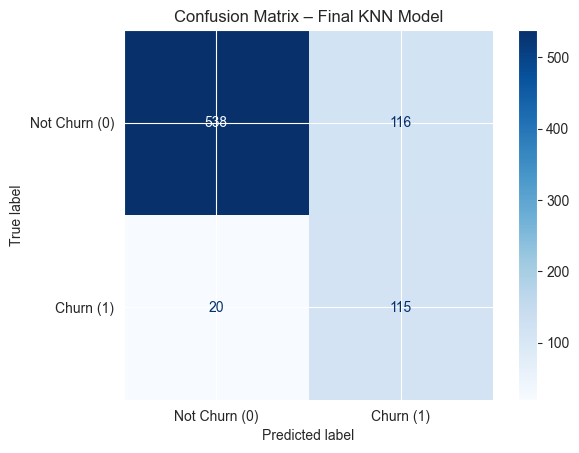

In [ ]:
# Confusion Matrix Visualization

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn (0)', 'Churn (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Final KNN Model")
plt.show()

*Key Findings:*
- TN = 538
- FP = 116
- FN = 20
- TP = 115

Even though the True Negatives (538) look the highest here, that’s completely expected because most customers in the dataset are actually non-churn. So the model naturally ends up confirming a lot of “not churn” cases correctly. What really matters for churn prediction is how well the model handles the churn class. In this case, the model successfully identified 115 real churners (TP) and only missed 20 of them (FN), which is a strong result and matches the high recall score we saw earlier. The 116 False Positives simply mean the model flagged some non-churn customers as churn, but this is a reasonable trade-off in churn use-cases where it's better to over-predict risk rather than miss customers who are actually about to leave. Overall, the confusion matrix shows that the model is doing a solid job capturing churners while keeping the most critical error (FN) relatively low.

## **H. Cost Benefit Analysis**

Because KNN does not provide native feature importance and our main goal is business decision-making, we can skip feature attribution and move directly into the cost–benefit analysis to evaluate the financial impact of deploying this churn model.

In [33]:
# Extract TN, FP, FN, TP from confusion matrix
# cm = [[TN, FP],
#       [FN, TP]]

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Total churn & not churn
actual_churn = TP + FN
actual_not_churn = TN + FP

print(f"Data Test Set (789 Customers):")
print(f"  Actually Churn: {actual_churn}")
print(f"  Actually not Churn: {actual_not_churn}")
print("-" * 30)
print(f"Model Prediction Result:")
print(f"  True Negative (TN): {TN}  (Predicted not Churn, Actually not Churn)")
print(f"  False Positive (FP): {FP} (Predicted Churn, Actually Not Churn) -> Intervention Cost")
print(f"  False Negative (FN): {FN} (Predicted Not Churn, Actually Churn) -> Loss prospects")
print(f"  True Positive (TP): {TP}  (Predicted Churn, Actually Churn) -> Successfully Handled")

Data Test Set (789 Customers):
  Actually Churn: 135
  Actually not Churn: 654
------------------------------
Model Prediction Result:
  True Negative (TN): 538  (Predicted not Churn, Actually not Churn)
  False Positive (FP): 116 (Predicted Churn, Actually Not Churn) -> Intervention Cost
  False Negative (FN): 20 (Predicted Not Churn, Actually Churn) -> Loss prospects
  True Positive (TP): 115  (Predicted Churn, Actually Churn) -> Successfully Handled


**Scenario 1: Do Nothing (Without Model Machine Learning)**

In [34]:
# The Cost for Scenario 1 (Without Model)

FN_cost = 700000  # Rp 700rb
FP_cost = 200000  # Rp 200rb

total_cost_witout_model = actual_churn * FN_cost

print(f"The Cost without Model:")
print(f"  {actual_churn} customer churn x Rp {FN_cost:,}")
print(f"  TOTAL LOSS = Rp {total_cost_witout_model:,}")

The Cost without Model:
  135 customer churn x Rp 700,000
  TOTAL LOSS = Rp 94,500,000


**Scenario 2: Using the ML Model**  
We only intervene on customers predicted as churn (Total FP + TP).
- We incorrectly intervene on FP customers who are actually not churn, resulting in a loss of Rp 200,000 per customer.
- We still miss FN customers who churn without being detected, causing a loss of Rp 700,000 per customer.
- We successfully save TP customers, which gives us a profit of Rp 700,000 per customer, but we still incur the Rp 200,000 intervention cost for them.

In [35]:
# The Cost for Scenario 2 (With Model)
total_cost_with_model = (FN * FN_cost) + (FP * FP_cost)

print(f"Cost for Scenario 2 (With Model):")
print(f"  Cost of 'Missed' (FN): {FN} customers x Rp {FN_cost:,} = Rp {FN * FN_cost:,}")
print(f"  Cost of 'Wrong Intervention' (FP): {FP} customers x Rp {FP_cost:,} = Rp {FP * FP_cost:,}")
print(f"  TOTAL COST = Rp {total_cost_with_model:,}")

Cost for Scenario 2 (With Model):
  Cost of 'Missed' (FN): 20 customers x Rp 700,000 = Rp 14,000,000
  Cost of 'Wrong Intervention' (FP): 116 customers x Rp 200,000 = Rp 23,200,000
  TOTAL COST = Rp 37,200,000


In [36]:
# Calculate Total Savings
potensi_penghematan = total_cost_witout_model - total_cost_with_model

print("\n" + "=" * 45)
print("COST–BENEFIT ANALYSIS RESULT (per 789 customers)")
print("=" * 45)
print(f"Total Loss (Without Model): Rp {total_cost_witout_model:,}")
print(f"Total Cost (With Model):    Rp {total_cost_with_model:,}")
print("-" * 45)
print(f"POTENTIAL SAVINGS:          Rp {potensi_penghematan:,}")
print("=" * 45)

# Calculate ROI (Return on Investment)
total_intervention_cost = (FP + TP) * FP_cost
roi = (potensi_penghematan / total_intervention_cost) * 100

print(f"\nTotal Intervention Cost (Investment): Rp {total_intervention_cost:,}")
print(f"Return on Investment (ROI): {roi:.2f}%")


COST–BENEFIT ANALYSIS RESULT (per 789 customers)
Total Loss (Without Model): Rp 94,500,000
Total Cost (With Model):    Rp 37,200,000
---------------------------------------------
POTENTIAL SAVINGS:          Rp 57,300,000

Total Intervention Cost (Investment): Rp 46,200,000
Return on Investment (ROI): 124.03%


## **I. Analytics Conclusion and Business Recommendations**

The project successfully addressed the core business challenge of inefficient customer retention by developing a robust predictive model and identifying key behavioral triggers for churn.

### 1. Problem Confirmed: The Retention Efficiency Gap
The analysis confirms the primary business problem: the company currently lacks a systematic, data-driven method to proactively identify high-risk customers. This deficit leads to inefficient, broad promotional spending and missed opportunities to prevent revenue loss, making retention efforts unnecessarily costly and suboptimal.

### 2. Clear Churn Drivers Identified via EDA
Exploratory Data Analysis (EDA) confirms that customer departure is not a random event. Churn propensity is significantly higher among customers exhibiting specific behavioral characteristics:
* **High-Risk Profiles:** Customers with **short tenure**, recent **one-time purchases**, **low satisfaction scores**, and a history of **submitting complaints** are substantially more likely to churn.
* **Loyalty Indicators:** Patterns in specific preferred product categories also signal lower loyalty.
* **Retention Lever:** Conversely, the data shows that providing **higher cashback amounts** appears to support retention, which serves as a key, actionable lever for future business recommendations.

### 3. Successful Predictive Model Development (KNN for Optimal Recall)
A K-Nearest Neighbors (KNN) machine learning model has been successfully developed and tuned to predict customers with a high probability of churning.
* **Strategic Metric Choice:** The model selection was strategically driven by the business objective: to minimize costly **False Negatives** (missing an actual churner). This error is considered the most detrimental, as it results in a direct loss of a customer and associated revenue.
* **Model Performance:** Although KNN is not the most interpretable model, it consistently delivered the highest **Recall** performance during both baseline evaluation and tuning, making it the optimal choice for the goal of identifying as many at-risk customers as possible for timely intervention.

### 4. Strategic Shift: From Broad to Targeted Retention
The implementation of this predictive model enables a critical shift in the e-commerce strategy. Instead of relying on broad and inefficient promotional campaigns, the company can now leverage the model's churn probability scores to:

* **Proactive, Targeted Outreach:** The company can identify and prioritize the specific, highest-risk customer segments for intervention. This allows for proactive engagement with personalized, timely retention offers (e.g., targeted discounts, customized cashback increases, or specialized customer service outreach).
* **Optimize Budget Allocation:** By focusing retention resources only on customers most likely to leave, the business can significantly reduce unnecessary marketing expenses (minimizing False Positives) and maximize the Return on Investment (ROI) of its retention campaigns.
* **Shift to Prevention:** The business moves from a reactive stance—addressing churn after it has occurred—to a **proactive intervention** strategy, where efforts are made *before* the customer actually leaves the platform.

### 5. Cost-Benefit Analysis

The primary value of the ML model is its financial impact: minimizing lost revenue (Cost of FN) versus the cost of intervention (Cost of FP).

- **Financial Assumptions & Model Performance:**

| Cost Metric | Value | Model Result (Test Set) |
| :--- | :--- | :--- |
| **Cost of Lost Customer (FN)** | $\text{Rp } 700,000$ | **FN = 20** (Missed Churners) |
| **Cost of Retention Intervention (FP)** | $\text{Rp } 200,000$ | **FP = 116** (Misallocated Promos) |
| **Actual Churners** | $135$ | **TP = 115** (Successfully Retained) |

- **Scenario Comparison**

| Scenario | Total Loss Calculation | Total Cost / Loss |
| :--- | :--- | :--- |
| **1. Without Model (Do Nothing)** | $135 \text{ Actual Churners} \times \text{Rp } 700,000$ | **$\mathbf{\text{Rp } 94,500,000}$** |
| **2. With ML Model (Proactive)** | $(20 \text{ FN} \times \text{Rp } 700,000) + (116 \text{ FP} \times \text{Rp } 200,000)$ | **$\mathbf{\text{Rp } 37,200,000}$** |{Rp } 37,200,000}$** |

- **Conclusion: Realized Savings**

The model enables a significant mitigation of financial risk:

*Potential Savings = 94,500,000 - Rp 37,200,000 = Rp 57,300,000*

*The machine learning model provides a direct financial benefit, achieving **Rp 57,300,000** in potential savings on the test set alone. This validates the strategic choice of prioritizing a model with high Recall to aggressively minimize the most expensive business error (False Negatives).*

## **J. Import Final Pipeline to Pickle**

In [37]:
import pickle

with open('churn.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)

In [39]:
X_train.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')